<a href="https://colab.research.google.com/github/ThomassTon/SML/blob/main/linear_regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3.1

### Imports
These are all the imports you will need for exercise 3.1. All exercises should be implemented using only the libraries below.

In [ ]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Linear Regression
In this exercise, you will work on linear regression with polynomial features where we model the function $f(\mathbf{x})$ as 

$$f(\mathbf{x}) = \mathbf{w}^\intercal \phi(\mathbf{x}).$$

The true model is a polynomial of degree 3

$$f(x) = 0.5 + (2x - 0.5)^2 + x^3$$

We further introduce noise into the system by adding a noise term $\varepsilon_i$ which is sampled from a Gaussian distribution

$$y = f(x) + \varepsilon_i, \varepsilon_i\sim \mathcal{N}(\varepsilon; 0, \sigma^2).$$

In [ ]:
def f(x):
  """The true polynomial that generated the data D
  Args:
    x: Input data
  Returns:
    Polynomial evaluated at x 
  """
  return x ** 3 + (2 * x - .5) ** 2 + .5

def generate_data(n, minval, maxval, variance=1., train=False, seed=0):
  """Generate the datasets. Note that we don't want to extrapolate, 
  and such, the eval data should always lie inside of the train data.
  Args:
    n: Number of datapoints to sample. n has to be atleast 2.
    minval: Lower boundary for samples x
    maxval: Upper boundary for samples x
    variance: Variance or squared standard deviation of the model
    train: Flag deciding whether we sample training or evaluation data
    seed: Random seed
  Returns:
    Tuple of randomly generated data x and the according y
  """
  # Set numpy random number generator
  rng = np.random.default_rng(seed)

  # Sample data along the x-axis
  if train:
    # We first sample uniformly on the x-Axis
    x = rng.uniform(minval, maxval, size=(n - 2,))
    # We will sample on datapoint beyond the min and max values to 
    # guarantee that we do not extrapolate during the evaluation
    margin = (maxval - minval) / 100
    min_x = rng.uniform(minval - margin, minval, (1,))
    max_x = rng.uniform(maxval, maxval + margin, (1,))
    x = np.concatenate((x, min_x, max_x))
  else:
    x = rng.uniform(minval, maxval, size=(n,))
  eps = rng.standard_normal(n)

  # 
  return x, f(x) + variance * eps

## Linear Least Squares Regression
In this exercise we will study linear least squares regression with polynomial features. In particular, we want to evaluate the influence of the polynomial degree $k$ that we assume a priori.

### Exercise 3.1.1
To carry out regression, we first need to define the basis functions $\phi(\mathbf{x})$. In this task we would like to use polynomial features of degree $k$.

Please work through the code and fill in the the `# TODO`s.

In [ ]:
def polynomial_features(x, degree):
  """
  Calculates polynomial features function of degree n.
  The feature function includes all exponents from 0 to n.
  Args:
    x: Input of size (N, D)
    degree: Polynomial degree
  Returns:
    Polynomial features evaluated at x of dim (degree, N)
  """
  # TODO: Your code here
  N = x.shape[0]
  x_ = np.zeros((degree+1,N))
  for i in range(degree+1):
    x_[i] = x**i
  return x_



def fit_w(x, y, lam, degree):
  """
  Fit the weights with the closed-form solution of ridge regression.
  Args:
    x: Input of size (N, D)
    y: Output of size (N,)
    lam: Regularization parameter lambda
    degree: Polynomial degree
  Returns:
    Optimal weights
  """
  # TODO: Your code here
  feature = polynomial_features(x, degree)
  weights = np.dot(feature, feature.T)
  weights += np.eye(weights.shape[0])*lam
  weights = np.linalg.pinv(weights)
  weights = np.dot(weights,feature)
  weights = np.dot(weights,y)

  return weights

def predict(x, w, degree):
  """
  Calculate the generalized linear regression estimate given x, 
  the feature function, and weights w.
  Args:
    x: input of size (N, D)
    w: Weights of size (M)
    degree: Polynomial degree
  Returns:
    Generalized linear regression estimate
  """
  # TODO: Your code here
  features = polynomial_features(x,degree)

  y_pred = np.dot(w.T, features)
  return y_pred

def calc_mse(x, y):
  """
  Calculates the mean squared error (MSE) between x and y
  Args:
    x: Data x of size (N,)
    y: Data y of size (N,)
  Returns:
    MSE 
  """
  MSE = (x-y)
  MSE = MSE**2
  MSE = np.mean(MSE)
  return MSE


Here you can try out your code by simply running the following cell. This cell will carry out your ridge regression implementation from above for $\lambda=0$ in which case we are provided with the linear least squares solution.

We evaluate the regression task on six different polynomial sizes $k = \{0,1,3,5,7,9\}$ based on your implementation of the MSE.

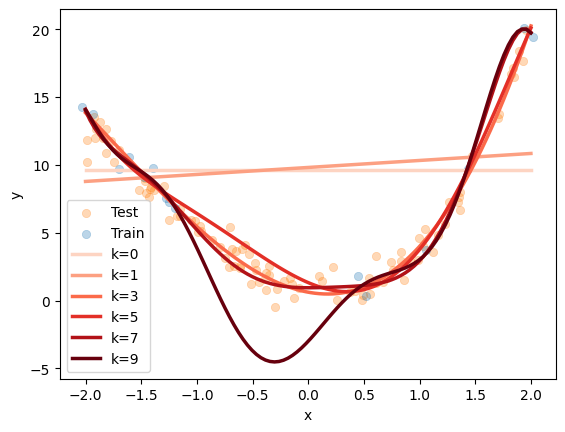

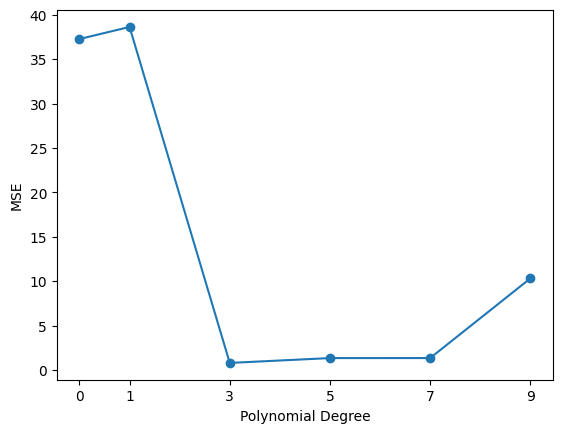

In [ ]:
%matplotlib inline

# Settings
n_train = 15
n_test = 100
minval = -2.
maxval = 2


train_data = generate_data(n_train, minval, maxval, train=True, seed=1001)
test_data = generate_data(n_test, minval, maxval, train=False, seed=1002)


def plot_linear_regression(x, y, labels, eval_quantity):
  """Plotting functionality for the prediction of linear regression 
  for K different polynomial degrees.
  Args:
    x: Data of size (K, N). The first dimension denotes the different 
      polynomial degrees that has been experimented with
    y: Data of size (K, N)
  """
  K = x.shape[0]
  colors = mpl.colormaps['Reds'].resampled(K+1)(range(1, K+1))
  fig = plt.figure()
  plt.scatter(test_data[0], test_data[1], color="tab:orange", linewidths=0.5, label="Test", alpha=0.3)
  plt.scatter(train_data[0], train_data[1], color="tab:blue", linewidths=0.5, label="Train", alpha=0.3)
  for i in range(K):
    plt.plot(x[i], y[i], label=f"{eval_quantity}={labels[i]}", color=colors[i], lw=2.5)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()

def plot_mse(mse, labels):
  """Plotting functionality of the MSE for K different polynomial degrees."""
  fig = plt.figure()
  plt.plot(labels, mse)
  plt.scatter(labels, mse)
  plt.xticks(labels)
  plt.ylabel("MSE")
  plt.xlabel("Polynomial Degree")

# Evaluate regression for different polynomial degrees
degrees = [0, 1, 3, 5, 7, 9]
xs, ys, mse = [], [], []
for degree in degrees:
  w = fit_w(
      train_data[0], train_data[1], 
      lam=0., # Edge case resulting in linear least squares regression
      degree=degree
  )
  # Predict the test data
  y_test = predict(test_data[0], w, degree)
  mse.append(calc_mse(y_test, test_data[1]))
  
  # Run regression over the whole interval
  xs.append(np.linspace(minval, maxval, 100))
  ys.append(predict(xs[-1], w, degree))
xs = np.stack(xs)
ys = np.stack(ys)

plot_linear_regression(xs, ys, labels=degrees, eval_quantity="k")
plot_mse(mse, degrees)

### Exercise 3.1.2
Please describe your results below in a few lines thereby answering which model you would choose and which phenomenon we see for small and large polynomial degrees.

---
It is not that the larger k is, the smaller the MSE is. In this task we can that k=3 is the best. More bigger K will cause overfitting. And the smaller k will cause very bigger MSE(underfitting)

---




## Bias Variance Tradeoff
Next up, we will compare the model performance of **ridge regression** based on the penalty parameter $\lambda$. For that we will evaluate the expected squared error of the true model against our predictions. As we have shown in the lecture, this leads to the bias-variance decomposition

$$L_{\hat{f}}(\mathbf{x}_{q}) = \mathbb{E}_{\mathcal{D}, \varepsilon}\left[\bigr(y(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right] = \sigma^2 + \textrm{bias}^{2}\left[ \hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\right] + \textrm{var}\left[ \hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\right]$$

Here $\hat{f}_{\mathcal{D}}$ denotes the function estimator trained on the data $\mathcal{D} = \{(y_i, \mathbf{x_i})\mid i=1,\dots,N\}$.
We have left the two following identities open in the lecture which are required to arrive at the above equation
\begin{align*}
    \mathbb{E}_{\mathcal{D},\varepsilon}\left[\varepsilon\thinspace\big(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x_q})\big)\right] &= 0\\
    \mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right] &= \bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q})\bigl)^{2} + \mathbb{E}_{\mathcal{D}}\left[\bigr(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right]
\end{align*}
Here, the notation is simplified by adding the variable $\bar{\hat{f}}(\mathbf{x}_{q})=\mathbb{E}_{\mathcal{D}}\left[\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\right]$.

### Exercise 3.1.3
Please show the two identities 
1. $\mathbb{E}_{\mathcal{D},\varepsilon}\left[\varepsilon\thinspace\big(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x_q})\big)\right] = 0$
2. $\mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right] = \bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q})\bigl)^{2} + \mathbb{E}_{\mathcal{D}}\left[\bigr(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right]$

---
Solution: \\
1. $\mathbb{E}_{\mathcal{D},\varepsilon}\left[\varepsilon\thinspace\big(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x_q})\big)\right] =\mathbb{E}_{\mathcal{D},\varepsilon}\left[\big(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x_q})\big)\right] \mathbb{E}_{\mathcal{D},\varepsilon}\left[\varepsilon\right]=0 \quad $ 
\
Becasue  $\quad \mathbb{E}_{\mathcal{D},\varepsilon}\left[\varepsilon\right]=0$

---
2. $\mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right] = \mathbb{E}_{\mathcal{D}}\left[(\bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))+(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl))^{2}\right] = \mathbb{E}_{\mathcal{D}}\left[ \bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))^2 \right] +\mathbb{E}_{\mathcal{D}}\left[ (\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^2\right] +2\mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl) \right]$ \\
Because  $\quad f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}) \quad$ is a constant value. So $\mathbb{E}_{\mathcal{D}}\left[ (f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))^2\right]=(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))^2$ \\
$\mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl) \right] = (f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))\mathbb{E}_{\mathcal{D}}\left[ (\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)\right]$ \\
Because $\quad \bar{\hat{f}}(\mathbf{x}_{q})=\mathbb{E}_{\mathcal{D}}\left[\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\right] \quad$ we can get: $\quad \mathbb{E}_{\mathcal{D}}\left[ (\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)\right] = \bar{\hat{f}}(\mathbf{x}_{q})-\mathbb{E}_{\mathcal{D}}\left[ \hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\right] =0 \quad 2\mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q}))(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl) \right]=0$ \\
And now we can get:$\quad  \mathbb{E}_{\mathcal{D}}\left[\bigr(f(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right] = \bigr(f(\mathbf{x}_{q})-\bar{\hat{f}}(\mathbf{x}_{q})\bigl)^{2} + \mathbb{E}_{\mathcal{D}}\left[\bigr(\bar{\hat{f}}(\mathbf{x}_{q})-\hat{f}_{\mathcal{D}}(\mathbf{x}_{q})\bigl)^{2}\right]$



The bias-variance tradeoff is typically a purely theoretical concept as it requires the evaluation of $f(x)$. In this task we assume that $f(x)$ is known and thus, an approximation of the bias and variance is possible. We approximatie the bias and variance by its sample means 
$$\text{Bias}\,\text{bias}^2[\hat{f}_\mathcal{D}] \approx \frac{1}{N}\sum_{i=1}^{N}\left(f(x_i) - \bar{\hat{f}}(x_i)\right),$$

$$\text{Var}\,\text{var}\left[\hat{f}_\mathcal{D}\right] \approx \frac{1}{NM}\sum_{i=1}^{N}\sum_{j=1}^{M}\left(\hat{f}_{\mathcal{D}_j}(x_i) - \bar{\hat{f}}(x_i)\right)^2$$

Here, $\bar{\hat{f}}(x_i)$ is the average prediction of the maximum likelihood over the data distribution $p(\mathcal{D})$ which we approximate given $M$ datasets $\mathcal{D}_j$
$$\bar{\hat{f}}(x_i) \approx \frac{1}{M}\sum_{j=1}^{M}\left(f_{\mathcal{D_j}}(x_i)\right).$$

To approximate the bias and variance, we first evaluate the maximum likelihood estimate $f_{\mathcal{D}_j}$ for each dataset $\mathcal{D}_j$. Afterwards we can approximate the two terms.

### Exercise 3.1.4
In this exercise we implement the average prediction $\bar{\hat{f}}(x_i)$, $\text{Bias}\,\text{bias}^2[\hat{f}_\mathcal{D}]$, and $\text{Var}\,\text{var}\left[\hat{f}_\mathcal{D}\right]$ as introduced above. 

Please work through the code and fill in the the `# TODO`s.

In [ ]:
def avg_prediction(x, ws, degree=3):
  """
  Approximation of the average prediction using the M function estimations
  Args:
    x: input data of size (N,)
    ws: The weights obtained from ridge regression of size (M, degree)
    degree: The polynomial degree
  Returns:
    The average prediction as a scalar
  """
  # TODO: Your code here
  features = polynomial_features(x, degree)
  y_pred = np.dot(ws, features)
  avg_pred = np.mean(y_pred,axis=0)
  return avg_pred


  



def calc_bias(x_q, ws, degree):
  """Estimate the bias.
  Args:
    x_q: Queries x of size (N,)
    ws: The weights obtained from ridge regression of size (M, degree)
    degree: The polynomial degree
  Returns:
    Bias
  """
  # TODO: Your code here
  fx = f(x_q)
  avg_pred= avg_prediction(x_q,ws,degree)
  Bias = np.mean((fx-avg_pred)**2)
  return Bias


def calc_variance(x_q, ws, degree):
  """Estimate the model variance
  Args:
    x_q: Queries x of size (N,)
    ws: The weights obtained from ridge regression of size (M, degree)
    degree: The polynomial degree
  Returns:
    Model variance
  """
  # TODO: Your code here

  features = polynomial_features(x_q, degree)
  y_pred = np.dot(ws, features)
  avg_pred = avg_prediction(x_q,ws,degree)
  var = np.mean((y_pred - avg_pred)**2)
  return var



You can test your implementation by running the below coding snippet. It estimate the bias and variance for $M = 25$ datasets with each dataset containing $N=20$ datapoints.

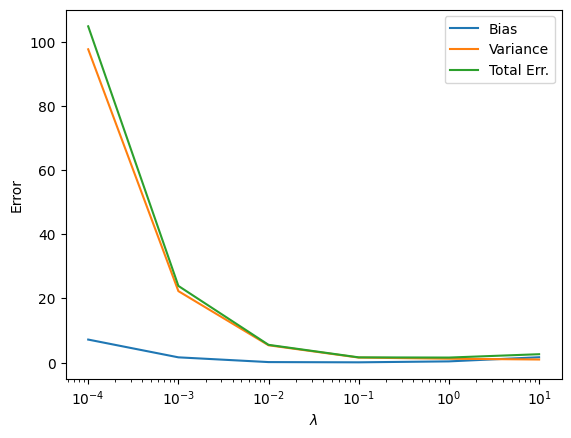

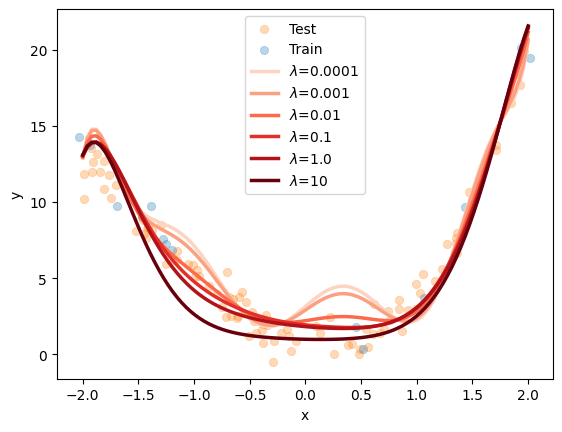

In [ ]:
%matplotlib inline

# Settings
n = 20
m = 25
degree = 9
train_datasets = []
seed = 3001
for i in range(m):
  train_datasets.append(generate_data(n_train, minval, maxval, train=True, seed=seed))
  seed += 1
eval_points = np.linspace(minval, maxval, n)

# Estimate the bias and variance
biases = []
vars = []
xs, ys = [], []
lambdas = [0.0001, 0.001, 0.01, 0.1, 1., 10]
for l in lambdas:
  w_maps = []
  for data in train_datasets:
    w = fit_w(
      data[0], data[1],
      l,
      9
    )
    w_maps.append(w)
  bias = calc_bias(eval_points, w_maps, degree)
  biases.append(bias)
  var = calc_variance(eval_points, w_maps, degree)
  vars.append(var)
  xs.append(np.linspace(minval, maxval, 100))
  ys.append(predict(xs[-1], w_maps[0], degree))

biases = np.array(biases)
vars = np.array(vars)
xs = np.stack(xs)
ys = np.stack(ys)
# Plot the bias and variance for different lambas
plt.figure()
plt.plot(lambdas, biases, label="Bias")
plt.plot(lambdas, vars, label="Variance")
plt.plot(lambdas, biases + vars, label="Total Err.")
plt.xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("Error")
plt.legend()
# Calculate predictions
plot_linear_regression(xs, ys, labels=lambdas, eval_quantity=r"$\lambda$")

### Exercise 3.1.5
Please explain the results in a few sentences. In particular, provide an explanation if the bias and variance behave as expected. For which regularization parameter $\lambda$ would you decide?

---
Solution: \\
The value of $\lambda$ don't have so big influence on the Bias. But will effect the Variance. A smaller $\lambda$ will have a bigger Variance. And I would choose the $\lambda = 1.0$. Because it has a minimal Total-Error. 

---

## Gradient Descent
In the lecture we have seen that the closed form solution of linear regression requires us to take the inverse $(\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}$. For high dimensional features, the inverse can be a high computational burden. For these reasons, gradient descent provides an alternative to approximate the weight vector.

### Exercise 3.1.6
Please implement gradient descent optimization to find the regression weights $\mathbf{w}$. We will use the loss from linear least squares with polynomial features of degree $k=3$

$$\mathcal{J}(\mathbf{w}) = ||\boldsymbol{\Phi}^\intercal\mathbf{w} - \mathbf{y}||^2.$$

The number of gradient updates is fixed to $n_{\text{iter}} = 1000$. The learning rate can be freely chosen, but a good initial value is lr=0.0001. Please update the gradient by using all the training data points $n_\text{train}$, i.e., no mini-batches.

We expect you to provide a plot of the learning curve, i.e., a plot of the MSE on the test data against the iterations. You can evaluate your model after $n_{\text{eval}}=20$ gradient updates. We further would like to see the model prediction after $n=0, 10, 100, 1000$ gradient updates/iterations.

In this task we expect you to provide the full code. Note that you are allowed to use all functions defined above.

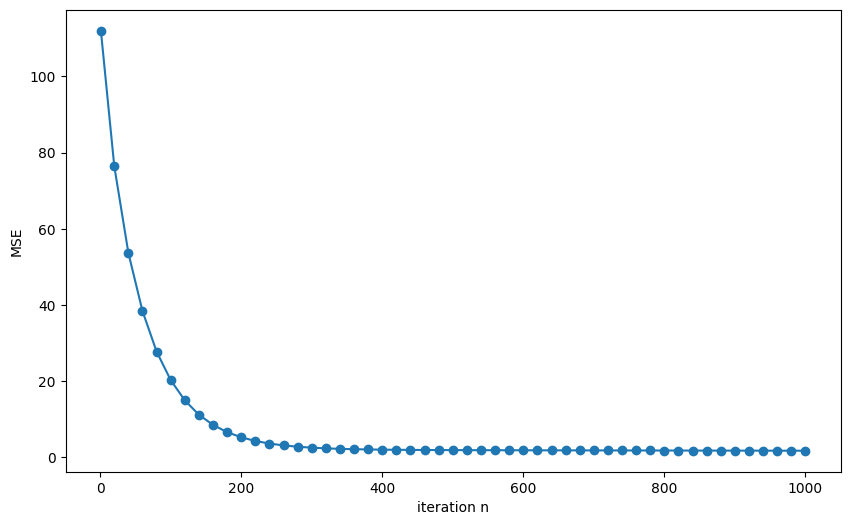

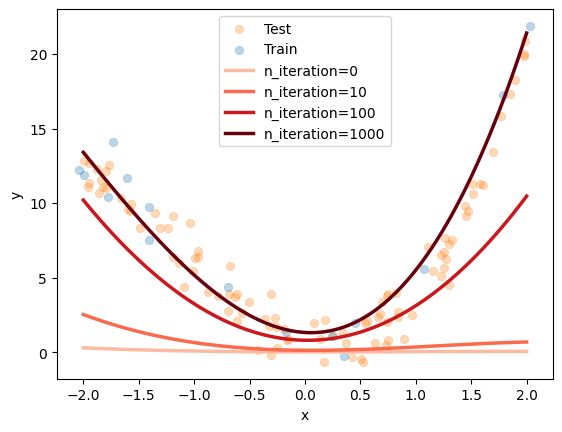

In [ ]:
%matplotlib inline

# Settings
n_train = 15
n_test = 100
minval = -2.
maxval = 2
degree = 3


train_data = generate_data(n_train, minval, maxval, train=True, seed=4001)
test_data = generate_data(n_test, minval, maxval, train=False, seed=4002)

# TODO: Your code here

n_itr=1000
lr = 0.0001
w = np.zeros((degree+1,1))
y = np.reshape(train_data[1],(15,1))
features = polynomial_features(train_data[0],degree)

def mse_com(features, w, y):
  y_pred = np.dot(features.T,w)
  MSE = calc_mse(y_pred, y)
  return MSE

MSE=[]
xs=[]
ys=[]
mse_itr=[]
for i in range(int(n_itr/20)+1):
  mse_itr.append(20*i)
mse_itr[0]=1
for i in range(n_itr):
  J_par = np.dot(features,(np.dot(features.T, w)-y))
  w -=lr*J_par
  if i==0 or (i+1)%20==0:
    MSE.append(mse_com(features, w, y))
  if i==0 or (i+1)==10 or (i+1)==100 or (i+1)==1000 :

    xs.append(np.linspace(minval, maxval, 100))
    ys.append(predict(xs[-1], w, degree).reshape(100,))


xs = np.stack(xs)

ys = np.stack(ys)


model_n=[0,10,100,1000]

def plot_mse(mse, labels):
  """Plotting functionality of the MSE for K different polynomial degrees."""
  plt.figure(figsize=(10, 6))
  plt.plot(labels, mse)
  plt.scatter(labels, mse)
  plt.ylabel("MSE")
  plt.xlabel("iteration n")  

plot_mse(MSE,mse_itr)

plot_linear_regression(xs,ys,model_n,eval_quantity="n_iteration")






